111_521
123_100
001_003

111
521
123
100
001
003

I should check if each folder has 111_521 and 521_111 images and mirror them into the train / validation /test

Are the distributions and male/female equal in all 111_521 and 521_111? Or it is easier to take real as a banchmark? What about the number? it should be more or less equal?

We can split by true and then add 111_521 and 521_111

get all youtube real
get face2face and check mirror naming
do split for real
make mask for all fakes based on above split
apply mask to file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_all = pd.read_excel('dataset.xlsx', index_col=0)

In [440]:
print(data_all.head())

                                                filename    gender        age  \
index                                                                           
0      /content/drive/My Drive/FakeImageDetector/real...  0.061687  32.637210   
1      /content/drive/My Drive/FakeImageDetector/real...  0.063749  31.867521   
2      /content/drive/My Drive/FakeImageDetector/real...  0.032942  34.179979   
3      /content/drive/My Drive/FakeImageDetector/real...  0.026315  33.717182   
4      /content/drive/My Drive/FakeImageDetector/real...  0.055017  37.760803   

      method  label fake_real_name    age_cat  gender10 gender_age_cat  \
index                                                                    
0       Real      1    real_images  age_30_40         0    0_age_30_40   
1       Real      1    real_images  age_30_40         0    0_age_30_40   
2       Real      1    real_images  age_30_40         0    0_age_30_40   
3       Real      1    real_images  age_30_40         0    0_a

In [445]:
data_all = data_all.reset_index()
print(data_all.loc[0])

index                                                             0
filename          /content/drive/My Drive/FakeImageDetector/real...
gender                                                    0.0616868
age                                                         32.6372
method                                                         Real
label                                                             1
fake_real_name                                          real_images
age_cat                                                   age_30_40
gender10                                                          0
gender_age_cat                                          0_age_30_40
imgname           21__outside_talking_still_laughing.mp4_image6.jpg
target_source                                                    21
Name: 0, dtype: object


In [446]:
data_df = data_all[data_all['fake_real_name'] == 'Deepfakes']

In [447]:
print(data_df.shape)

(5401, 12)


In [448]:
print(data_all.shape)

(52962, 12)


In [449]:
data_all_new = data_all[data_all['fake_real_name'] != 'Deepfakes']
print(data_all_new.shape)

(47561, 12)


In [450]:
data_all_new.to_csv("dataset_new.csv", index=0)

In [293]:
data_real = data_all[data_all['method'] == 'Real']

In [295]:
data_real['imgname'] = data_real['filename'].apply(lambda x: x.split('/')[-1])
print(data_real['imgname'])

index
0        21__outside_talking_still_laughing.mp4_image6.jpg
1        21__outside_talking_still_laughing.mp4_image7.jpg
2        21__outside_talking_still_laughing.mp4_image8.jpg
3        21__outside_talking_still_laughing.mp4_image9.jpg
4        21__outside_talking_still_laughing.mp4_image10...
5        21__outside_talking_still_laughing.mp4_image11...
6        21__outside_talking_still_laughing.mp4_image12...
7        21__outside_talking_still_laughing.mp4_image13...
8        21__outside_talking_still_laughing.mp4_image14...
9        21__outside_talking_still_laughing.mp4_image15...
10       21__outside_talking_still_laughing.mp4_image16...
11       21__outside_talking_still_laughing.mp4_image18...
12       21__outside_talking_still_laughing.mp4_image19...
13                        27__kitchen_still.mp4_image1.jpg
14                        27__kitchen_still.mp4_image2.jpg
15                        27__kitchen_still.mp4_image3.jpg
16                        27__kitchen_still.mp4_im

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [320]:
data_all['fake_real_name'] = data_all['filename'].apply(lambda x: x.split('/'))
data_all['fake_real_name'] = data_all['fake_real_name'].apply(lambda x: x[-4])
data_all['fake_real_name'] = data_all['fake_real_name'].apply(lambda x: x if x != "My Drive" else "real_images")
print(data_all['fake_real_name'])

index
0       real_images
1       real_images
2       real_images
3       real_images
4       real_images
5       real_images
6       real_images
7       real_images
8       real_images
9       real_images
10      real_images
11      real_images
12      real_images
13      real_images
14      real_images
15      real_images
16      real_images
17      real_images
18      real_images
19      real_images
20      real_images
21      real_images
22      real_images
23      real_images
24      real_images
25      real_images
26      real_images
27      real_images
28      real_images
29      real_images
           ...     
5371      Deepfakes
5372      Deepfakes
5373      Deepfakes
5374      Deepfakes
5375      Deepfakes
5376      Deepfakes
5377      Deepfakes
5378      Deepfakes
5379      Deepfakes
5380      Deepfakes
5381      Deepfakes
5382      Deepfakes
5383      Deepfakes
5384      Deepfakes
5385      Deepfakes
5386      Deepfakes
5387      Deepfakes
5388      Deepfakes
5389      Deep

In [321]:
data_all['age_cat'] = pd.cut(data_all['age'], bins = [0., 20., 30., 40., 50., np.inf], labels = 
                                ['age_less_20', 'age_20_30', 'age_30_40', 'age_40_50', 'age_above_50'])

In [322]:
data_all['gender10'] = data_all['gender'].apply(lambda x: 1 if x > 0.5 else 0)

In [324]:
data_all['gender_age_cat'] = data_all['gender10'].astype(str) + "_" + data_all['age_cat'].astype(str)

In [325]:
data_all['imgname'] = data_all['filename'].apply(lambda x: x.split('/')[-1])

In [333]:
t = "21__outside_talking_still_laughing.mp4_image6.jpg"
print(t[:2])
print(t[3])
print(t[4])

21
_
o


In [330]:
print(data_all['imgname'].loc[0])

index
0    21__outside_talking_still_laughing.mp4_image6.jpg
0                                    864_839.mp4_7.jpg
0                                    053_095.mp4_7.jpg
0          14_03__talking_angry_couch__L0GHYIFS_36.bmp
0                                    440_364.mp4_2.jpg
0                                        215_208_2.bmp
Name: imgname, dtype: object


In [334]:
def get_target_source(img):
    if (img[2] == "_") and (img[3] == "_"):
        return img[:2]
    if (img[2] != "_") and (img[3] == "_"):
        return img[:7]
    if (img[2] == "_") and (img[3] != "_"):
        return img[:5]
    if (img[4:7] =='mp4'):
        return img[:3]

In [335]:
data_all['target_source'] = data_all['imgname'].apply(lambda x: get_target_source(x))

In [336]:
print(data_all['target_source'])

index
0            21
1            21
2            21
3            21
4            21
5            21
6            21
7            21
8            21
9            21
10           21
11           21
12           21
13           27
14           27
15           27
16           27
17           27
18           27
19           27
20           27
21           27
22           27
23           27
24           27
25           27
26           27
27           27
28           27
29           27
         ...   
5371    554_572
5372    554_572
5373    554_572
5374    572_554
5375    572_554
5376    572_554
5377    572_554
5378    572_554
5379    896_128
5380    896_128
5381    896_128
5382    896_128
5383    896_128
5384    896_128
5385    128_896
5386    128_896
5387    128_896
5388    128_896
5389    128_896
5390    128_896
5391    337_522
5392    337_522
5393    337_522
5394    337_522
5395    337_522
5396    337_522
5397    522_337
5398    522_337
5399    522_337
5400    522_337
Name: target_sourc

In [339]:

cols = ['filename', 'gender', 'age', 'method', 'label', 'fake_real_name', 'age_cat', 'gender10', 'gender_age_cat', 
       'imgname', 'target_source']
data_all = data_all.loc[:, cols]
print(data_all.head())

                                                filename    gender        age  \
index                                                                           
0      /content/drive/My Drive/FakeImageDetector/real...  0.061687  32.637210   
1      /content/drive/My Drive/FakeImageDetector/real...  0.063749  31.867521   
2      /content/drive/My Drive/FakeImageDetector/real...  0.032942  34.179979   
3      /content/drive/My Drive/FakeImageDetector/real...  0.026315  33.717182   
4      /content/drive/My Drive/FakeImageDetector/real...  0.055017  37.760803   

      method  label fake_real_name    age_cat  gender10 gender_age_cat  \
index                                                                    
0       Real      1    real_images  age_30_40         0    0_age_30_40   
1       Real      1    real_images  age_30_40         0    0_age_30_40   
2       Real      1    real_images  age_30_40         0    0_age_30_40   
3       Real      1    real_images  age_30_40         0    0_a

In [340]:
data_dfd = data_all[data_all['fake_real_name'] == 'DeepFakeDetection']

In [346]:
print(data_dfd.head())

                                                filename    gender        age  \
index                                                                           
0      /content/drive/My Drive/FakeImageDetector/data...  0.720798  32.394219   
1      /content/drive/My Drive/FakeImageDetector/data...  0.477959  31.788816   
2      /content/drive/My Drive/FakeImageDetector/data...  0.404159  29.169129   
3      /content/drive/My Drive/FakeImageDetector/data...  0.174277  31.118909   
4      /content/drive/My Drive/FakeImageDetector/data...  0.453684  27.199726   

                  method  label     fake_real_name    age_cat  gender10  \
index                                                                     
0      DeepFakeDetection      0  DeepFakeDetection  age_30_40         1   
1      DeepFakeDetection      0  DeepFakeDetection  age_30_40         0   
2      DeepFakeDetection      0  DeepFakeDetection  age_20_30         0   
3      DeepFakeDetection      0  DeepFakeDetection  age_3

In [341]:
print(data_dfd.shape)

(11180, 11)


In [345]:
data_dfd_unq = data_dfd.drop_duplicates(subset =['target_source'], keep='first') 
print(data_dfd_unq.shape)

(253, 11)


In [348]:
data_actor_real = data_all[data_all['method'] == 'Real']
data_actor_real = data_actor_real[data_actor_real['target_source'].apply(lambda x: True if len(x) == 2 else False)]

In [350]:
data_actor_real_unq = data_actor_real.drop_duplicates(subset =['target_source'], keep='first')
print(data_actor_real_unq.shape)

(28, 11)


In [351]:
print(data_dfd_unq['gender_age_cat'].value_counts()/data_dfd_unq.shape[0])

0_age_30_40      0.399209
1_age_20_30      0.205534
0_age_20_30      0.201581
1_age_30_40      0.162055
0_age_40_50      0.015810
1_age_40_50      0.011858
1_age_less_20    0.003953
Name: gender_age_cat, dtype: float64


In [352]:
print(data_actor_real_unq['gender_age_cat'].value_counts()/data_actor_real_unq.shape[0])

0_age_30_40      0.428571
1_age_20_30      0.214286
0_age_20_30      0.178571
1_age_30_40      0.071429
0_age_40_50      0.035714
1_age_40_50      0.035714
1_age_less_20    0.035714
Name: gender_age_cat, dtype: float64


In [363]:
target_source_dfd = data_dfd_unq['target_source'].tolist()

In [367]:
print(target_source_dfd)

['14_03', '20_13', '27_25', '03_07', '18_06', '12_06', '21_15', '10_22', '26_03', '02_09', '07_02', '07_21', '02_15', '28_16', '12_13', '04_07', '03_15', '20_09', '12_15', '01_03', '24_19', '02_06', '17_08', '18_15', '18_09', '13_02', '25_06', '10_23', '02_13', '25_20', '09_26', '23_24', '23_19', '01_02', '23_22', '21_09', '03_13', '27_01', '17_16', '11_01', '28_05', '09_03', '14_13', '13_12', '20_12', '07_14', '26_04', '12_02', '07_15', '14_06', '26_25', '14_02', '12_25', '20_15', '18_14', '11_13', '21_03', '13_03', '15_03', '19_24', '02_11', '14_26', '03_01', '22_23', '21_01', '11_07', '02_01', '09_25', '13_26', '25_15', '27_18', '24_23', '19_23', '27_26', '15_02', '01_11', '16_05', '06_27', '21_11', '07_25', '20_25', '09_13', '25_27', '12_21', '20_26', '15_06', '01_26', '27_13', '26_15', '03_14', '07_04', '20_21', '24_22', '28_08', '18_11', '14_18', '08_28', '12_07', '15_12', '08_05', '22_24', '03_06', '07_03', '06_15', '18_26', '08_17', '03_02', '08_16', '09_20', '13_20', '01_04', 

In [368]:
revv = []
for v in target_source_dfd:
    print(v)
    rv = v[3:5] + "_" + v[:2]
    print(rv)
    if rv in target_source_dfd:
        revv.append(rv)


14_03
03_14
20_13
13_20
27_25
25_27
03_07
07_03
18_06
06_18
12_06
06_12
21_15
15_21
10_22
22_10
26_03
03_26
02_09
09_02
07_02
02_07
07_21
21_07
02_15
15_02
28_16
16_28
12_13
13_12
04_07
07_04
03_15
15_03
20_09
09_20
12_15
15_12
01_03
03_01
24_19
19_24
02_06
06_02
17_08
08_17
18_15
15_18
18_09
09_18
13_02
02_13
25_06
06_25
10_23
23_10
02_13
13_02
25_20
20_25
09_26
26_09
23_24
24_23
23_19
19_23
01_02
02_01
23_22
22_23
21_09
09_21
03_13
13_03
27_01
01_27
17_16
16_17
11_01
01_11
28_05
05_28
09_03
03_09
14_13
13_14
13_12
12_13
20_12
12_20
07_14
14_07
26_04
04_26
12_02
02_12
07_15
15_07
14_06
06_14
26_25
25_26
14_02
02_14
12_25
25_12
20_15
15_20
18_14
14_18
11_13
13_11
21_03
03_21
13_03
03_13
15_03
03_15
19_24
24_19
02_11
11_02
14_26
26_14
03_01
01_03
22_23
23_22
21_01
01_21
11_07
07_11
02_01
01_02
09_25
25_09
13_26
26_13
25_15
15_25
27_18
18_27
24_23
23_24
19_23
23_19
27_26
26_27
15_02
02_15
01_11
11_01
16_05
05_16
06_27
27_06
21_11
11_21
07_25
25_07
20_25
25_20
09_13
13_09
25_27
27_25
12_2

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [371]:
def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 

print(Diff(target_source_dfd, revv))
print(len(Diff(target_source_dfd, revv)))

['02_11', '27_14', '09_11', '11_07', '10_24', '20_18', '14_01', '21_09', '15_27', '02_04', '21_18', '12_21', '04_27', '03_04', '15_04', '11_04', '13_25', '15_13', '26_15', '20_21', '07_25', '06_27', '01_12', '20_27', '21_06']
25


In [ ]:
1. get target_source_dfd_rev and set a diff into a separate list
2. make target_source_dfd_rev into 2 separate lists
3. make splits
4. check age and gender distributions

In [377]:
diff_target_rev = Diff(target_source_dfd, revv)
target_source_dfd_rev = Diff(target_source_dfd, diff_target_rev)

In [373]:
print(target_source_dfd)

['14_03', '20_13', '27_25', '03_07', '18_06', '12_06', '21_15', '10_22', '26_03', '02_09', '07_02', '07_21', '02_15', '28_16', '12_13', '04_07', '03_15', '20_09', '12_15', '01_03', '24_19', '02_06', '17_08', '18_15', '18_09', '13_02', '25_06', '10_23', '02_13', '25_20', '09_26', '23_24', '23_19', '01_02', '23_22', '21_09', '03_13', '27_01', '17_16', '11_01', '28_05', '09_03', '14_13', '13_12', '20_12', '07_14', '26_04', '12_02', '07_15', '14_06', '26_25', '14_02', '12_25', '20_15', '18_14', '11_13', '21_03', '13_03', '15_03', '19_24', '02_11', '14_26', '03_01', '22_23', '21_01', '11_07', '02_01', '09_25', '13_26', '25_15', '27_18', '24_23', '19_23', '27_26', '15_02', '01_11', '16_05', '06_27', '21_11', '07_25', '20_25', '09_13', '25_27', '12_21', '20_26', '15_06', '01_26', '27_13', '26_15', '03_14', '07_04', '20_21', '24_22', '28_08', '18_11', '14_18', '08_28', '12_07', '15_12', '08_05', '22_24', '03_06', '07_03', '06_15', '18_26', '08_17', '03_02', '08_16', '09_20', '13_20', '01_04', 

In [465]:
print(diff_target_rev)
if '14_03' in diff_target_rev:
    print('year')
else:
    print('no')

['02_11', '27_14', '09_11', '11_07', '10_24', '20_18', '14_01', '21_09', '15_27', '02_04', '21_18', '12_21', '04_27', '03_04', '15_04', '11_04', '13_25', '15_13', '26_15', '20_21', '07_25', '06_27', '01_12', '20_27', '21_06']
no


In [467]:
print(target_source_dfd_rev)
if '14_03' in target_source_dfd_rev:
    print('yes')
else:
    print('no')

['20_13', '24_22', '08_17', '07_02', '06_14', '01_03', '26_11', '27_02', '14_15', '13_02', '06_11', '21_14', '07_09', '04_21', '19_22', '02_14', '27_13', '09_26', '25_18', '27_03', '26_06', '14_06', '12_14', '14_09', '01_11', '25_20', '19_24', '02_21', '03_13', '10_19', '21_01', '15_14', '02_27', '12_15', '18_06', '25_26', '01_26', '25_09', '07_15', '13_26', '03_27', '06_15', '02_09', '14_03', '18_14', '14_07', '18_27', '06_20', '18_26', '04_01', '14_26', '26_14', '06_07', '01_04', '09_07', '14_13', '05_16', '03_26', '11_03', '08_28', '01_02', '18_25', '10_22', '08_16', '21_25', '22_19', '21_11', '24_23', '06_04', '11_13', '23_19', '15_03', '09_02', '20_14', '04_18', '13_12', '21_07', '12_25', '03_21', '11_26', '26_07', '17_16', '18_12', '18_09', '05_28', '13_14', '09_01', '21_03', '27_01', '26_20', '07_04', '25_15', '24_19', '21_04', '11_06', '20_06', '14_21', '25_12', '07_20', '20_25', '19_10', '28_08', '28_05', '03_01', '12_07', '02_03', '11_18', '12_18', '23_10', '06_03', '15_12', 

In [378]:
target_half = []
source_half = []
for ts in target_source_dfd_rev:
    if ts[:2] not in source_half:
        target_half.append(ts[:2])
    if ts[3:5] not in target_half:
        source_half.append(ts[3:5])
print(len(target_half))
print(target_half[0])
print(len(source_half))
print(source_half[0])

120
20
108
13


In [382]:
print(set(target_half))
print(set(source_half))

{'04', '19', '26', '06', '12', '24', '21', '25', '27', '20', '10', '01', '05', '07', '08'}
{'14', '28', '16', '09', '23', '22', '02', '18', '11', '15', '03', '13', '17'}


In [390]:
targets_unique = []
for trev in target_source_dfd_rev:
    if trev[:2] in set(target_half):
        targets_unique.append(trev)
print(len(targets_unique))

120


In [471]:
targets_unique2 =[]
source_unique2 =[]
for ts in target_source_dfd_rev:
    if ts not in source_unique2:
        targets_unique2.append(ts)
        rv = ts[3:5] + "_" + ts[:2]
        source_unique2.append(rv)
print(len(targets_unique2))
print(len(source_unique2))

114
114


In [470]:
    len(targets_unique)

120

In [ ]:
if '14_03' in 

In [391]:
print(targets_unique)

['20_13', '24_22', '08_17', '07_02', '06_14', '01_03', '26_11', '27_02', '06_11', '21_14', '07_09', '04_21', '19_22', '27_13', '25_18', '27_03', '26_06', '12_14', '01_11', '25_20', '19_24', '10_19', '21_01', '12_15', '25_26', '01_26', '25_09', '07_15', '06_15', '06_20', '04_01', '26_14', '06_07', '01_04', '05_16', '08_28', '01_02', '10_22', '08_16', '21_25', '21_11', '24_23', '06_04', '20_14', '04_18', '21_07', '12_25', '26_07', '05_28', '21_03', '27_01', '26_20', '07_04', '25_15', '24_19', '21_04', '20_06', '25_12', '07_20', '20_25', '19_10', '12_07', '12_18', '06_03', '26_27', '01_20', '06_25', '06_02', '26_12', '01_15', '21_15', '07_26', '07_06', '26_03', '04_26', '12_02', '26_04', '19_23', '21_02', '12_20', '26_13', '01_09', '04_06', '04_07', '06_26', '27_26', '20_07', '25_06', '01_21', '06_18', '25_02', '07_14', '26_01', '20_03', '07_12', '20_01', '05_17', '12_26', '12_06', '25_21', '20_09', '05_08', '04_13', '20_15', '07_03', '26_25', '20_12', '26_18', '20_26', '25_27', '08_05', 

In [392]:
data_dfd_unq_target = data_dfd_unq[data_dfd_unq['target_source'].isin(targets_unique)]

In [472]:
data_dfd_unq_target2 = data_dfd_unq[data_dfd_unq['target_source'].isin(targets_unique2)]

In [401]:
print(data_dfd_unq_target.shape)
print(data_dfd_unq_target['gender_age_cat'].value_counts())

(120, 11)
0_age_30_40      48
1_age_20_30      29
1_age_30_40      21
0_age_20_30      17
0_age_40_50       2
1_age_40_50       2
1_age_less_20     1
Name: gender_age_cat, dtype: int64


In [473]:
print(data_dfd_unq_target2.shape)
print(data_dfd_unq_target2['gender_age_cat'].value_counts())

(114, 11)
0_age_30_40    50
0_age_20_30    22
1_age_20_30    20
1_age_30_40    19
1_age_40_50     3
Name: gender_age_cat, dtype: int64


In [402]:
data_dfd_unq_source = data_dfd_unq[~data_dfd_unq['target_source'].isin(targets_unique)]

In [474]:
data_dfd_unq_source2 = data_dfd_unq[~data_dfd_unq['target_source'].isin(targets_unique2)]

In [403]:
print(data_dfd_unq_source.shape)
print(data_dfd_unq_source['gender_age_cat'].value_counts())

(133, 11)
0_age_30_40    53
0_age_20_30    34
1_age_20_30    23
1_age_30_40    20
0_age_40_50     2
1_age_40_50     1
Name: gender_age_cat, dtype: int64


In [475]:
print(data_dfd_unq_source2.shape)
print(data_dfd_unq_source2['gender_age_cat'].value_counts())

(139, 11)
0_age_30_40      51
1_age_20_30      32
0_age_20_30      29
1_age_30_40      22
0_age_40_50       4
1_age_less_20     1
Name: gender_age_cat, dtype: int64


In [404]:

data_dfd_unq_rev = data_dfd_unq[data_dfd_unq['target_source'].isin(diff_target_rev)]

In [406]:

print(data_dfd_unq_rev.shape)
print(data_dfd_unq_rev['gender_age_cat'].value_counts())

(25, 11)
0_age_30_40    10
1_age_20_30     6
0_age_20_30     5
1_age_30_40     3
0_age_40_50     1
Name: gender_age_cat, dtype: int64


In [408]:
print(data_dfd_unq_source[data_dfd_unq_source['gender_age_cat'] == '1_age_40_50'])

                                                filename    gender        age  \
index                                                                           
2947   /content/drive/My Drive/FakeImageDetector/data...  0.835261  42.453071   

                  method  label     fake_real_name    age_cat  gender10  \
index                                                                     
2947   DeepFakeDetection      0  DeepFakeDetection  age_40_50         1   

      gender_age_cat                               imgname target_source  
index                                                                     
2947     1_age_40_50  03_20__kitchen_still__Z6V05FXO_0.bmp         03_20  


In [414]:
print(data_dfd_unq_source[data_dfd_unq_source['gender_age_cat'] == '0_age_40_50'])

                                                filename    gender        age  \
index                                                                           
1025   /content/drive/My Drive/FakeImageDetector/data...  0.212863  40.634197   
7039   /content/drive/My Drive/FakeImageDetector/data...  0.014911  40.071716   

                  method  label     fake_real_name    age_cat  gender10  \
index                                                                     
1025   DeepFakeDetection      0  DeepFakeDetection  age_40_50         0   
7039   DeepFakeDetection      0  DeepFakeDetection  age_40_50         0   

      gender_age_cat                                            imgname  \
index                                                                     
1025     0_age_40_50             11_07__exit_phone_room__PGC20QSY_0.bmp   
7039     0_age_40_50  13_11__outside_talking_still_laughing__61T622E...   

      target_source  
index                
1025          11_07  
7039   

In [420]:
print(data_dfd_unq_target[data_dfd_unq_target['gender_age_cat'] == '1_age_40_50'])

                                                filename    gender        age  \
index                                                                           
2826   /content/drive/My Drive/FakeImageDetector/data...  0.744470  40.423057   
10140  /content/drive/My Drive/FakeImageDetector/data...  0.717255  45.274531   

                  method  label     fake_real_name    age_cat  gender10  \
index                                                                     
2826   DeepFakeDetection      0  DeepFakeDetection  age_40_50         1   
10140  DeepFakeDetection      0  DeepFakeDetection  age_40_50         1   

      gender_age_cat                                      imgname  \
index                                                               
2826     1_age_40_50         05_28__hugging_happy__VR9127O1_0.bmp   
10140    1_age_40_50  07_20__talking_against_wall__KV6Q7D6C_0.bmp   

      target_source  
index                
2826          05_28  
10140         07_20  


In [421]:
print(data_dfd_unq_target[data_dfd_unq_target['gender_age_cat'] == '0_age_40_50'])

                                                filename    gender        age  \
index                                                                           
1307   /content/drive/My Drive/FakeImageDetector/data...  0.026461  40.051508   
10919  /content/drive/My Drive/FakeImageDetector/data...  0.356457  40.117221   

                  method  label     fake_real_name    age_cat  gender10  \
index                                                                     
1307   DeepFakeDetection      0  DeepFakeDetection  age_40_50         0   
10919  DeepFakeDetection      0  DeepFakeDetection  age_40_50         0   

      gender_age_cat                                     imgname target_source  
index                                                                           
1307     0_age_40_50      20_25__exit_phone_room__MUS0X71T_0.bmp         20_25  
10919    0_age_40_50  26_01__secret_conversation__BTVMWLG6_0.bmp         26_01  


In [422]:
print(data_dfd_unq_target[data_dfd_unq_target['gender_age_cat'] == '1_age_less_20'])

                                                filename    gender        age  \
index                                                                           
4973   /content/drive/My Drive/FakeImageDetector/data...  0.671382  16.453061   

                  method  label     fake_real_name      age_cat  gender10  \
index                                                                       
4973   DeepFakeDetection      0  DeepFakeDetection  age_less_20         1   

      gender_age_cat                                            imgname  \
index                                                                     
4973   1_age_less_20  06_12__outside_talking_still_laughing__3K21NFN...   

      target_source  
index                
4973          06_12  


In [416]:
#I remove 03_20, 11_07, 13_11
data_dfd_unq_source = data_dfd_unq_source[data_dfd_unq_source['target_source'] != '03_20']
print(data_dfd_unq_source.shape)
data_dfd_unq_source = data_dfd_unq_source[data_dfd_unq_source['target_source'] != '11_07']
data_dfd_unq_source = data_dfd_unq_source[data_dfd_unq_source['target_source'] != '13_11']
print(data_dfd_unq_source.shape)

(130, 11)
(130, 11)


In [423]:
rear_people = ['05_28', '07_20', '20_25', '26_01', '06_12', '11_07']
data_dfd_unq_target = data_dfd_unq_target[~data_dfd_unq_target['target_source'].isin(rear_people)]

'05_28':  1_age_40_50 train
'07_20': 1_age_40_50 val
'20_25': 0_age_40_50 train
'26_01': 0_age_40_50 val
'11_07': '0_age_40_50' test
'06_12': 1_age_less_20 train


In [418]:
data_dfd_unq_source['gender_age_cat'].value_counts()

0_age_30_40    53
0_age_20_30    34
1_age_20_30    23
1_age_30_40    20
Name: gender_age_cat, dtype: int64

In [426]:
print(data_dfd_unq_rev[data_dfd_unq_rev['gender_age_cat'] == '0_age_40_50'])

                                                filename    gender        age  \
index                                                                           
1025   /content/drive/My Drive/FakeImageDetector/data...  0.212863  40.634197   

                  method  label     fake_real_name    age_cat  gender10  \
index                                                                     
1025   DeepFakeDetection      0  DeepFakeDetection  age_40_50         0   

      gender_age_cat                                 imgname target_source  
index                                                                       
1025     0_age_40_50  11_07__exit_phone_room__PGC20QSY_0.bmp         11_07  


In [427]:
data_dfd_unq_rev = data_dfd_unq_rev[data_dfd_unq_rev['target_source'] != '11_07']

In [424]:
x

In [425]:
data_dfd_unq_train, data_dfd_unq_val = train_test_split(data_dfd_unq_train_validation, test_size=0.2, 
                                         stratify = data_dfd_unq_train_validation['gender_age_cat'], 
                                         random_state=42)

In [429]:
data_dfd_unq_rev_train_validation, data_dfd_unq_rev_test = train_test_split(data_dfd_unq_rev, test_size=0.2, 
                                                                           stratify = data_dfd_unq_rev['gender_age_cat'], 
                                                                           random_state=42)

In [430]:
data_dfd_unq_rev_train, data_dfd_unq_rev_val = train_test_split(data_dfd_unq_rev_train_validation, test_size=0.2, 
                                                                           stratify = data_dfd_unq_rev_train_validation['gender_age_cat'], 
                                                                           random_state=42)

In [476]:
data_dfd_unq_train_validation2, data_dfd_unq_target_test2 = train_test_split(data_dfd_unq_target2, test_size=0.2, 
                                                                           stratify = data_dfd_unq_target2['gender_age_cat'], 
                                                                           random_state=42)

In [477]:
data_dfd_unq_train2, data_dfd_unq_val2 = train_test_split(data_dfd_unq_train_validation2, test_size=0.2, 
                                         stratify = data_dfd_unq_train_validation2['gender_age_cat'], 
                                         random_state=42)

In [ ]:
'05_28':  1_age_40_50 train
'07_20': 1_age_40_50 val
'20_25': 0_age_40_50 train
'26_01': 0_age_40_50 val
'11_07': '0_age_40_50' test
'06_12': 1_age_less_20 train

In [456]:
import copy
def extend_list_with_reverse(l):
    rev_l = []
    for ts in l:
        rts = ts[3:5] + "_" + ts[:2]
        rev_l.append(rts)
    
    return l+ rev_l

l = ['02_03', '05_11']
print(extend_list_with_reverse(l))

['02_03', '05_11', '03_02', '11_05']


In [457]:
tvt_dfd_ts = {}
tvt_dfd_ts['train'] = data_dfd_unq_train['target_source'].tolist() + data_dfd_unq_rev_train['target_source'].tolist()
tvt_dfd_ts['train'] = extend_list_with_reverse(tvt_dfd_ts['train']) + ['05_28', '20_25', '06_12']
print(tvt_dfd_ts['train'])

['27_02', '01_15', '25_09', '25_15', '21_07', '07_13', '21_14', '01_04', '26_14', '04_26', '01_02', '07_21', '24_23', '04_21', '01_09', '20_26', '06_25', '26_04', '07_09', '26_11', '04_18', '21_02', '05_08', '25_27', '20_06', '07_02', '06_02', '06_18', '06_26', '26_07', '26_06', '26_13', '10_19', '20_12', '27_18', '06_20', '04_06', '21_11', '25_02', '21_25', '27_13', '25_12', '12_15', '20_09', '06_07', '12_20', '08_05', '07_14', '12_13', '26_18', '24_19', '26_27', '26_12', '05_17', '26_25', '24_22', '06_14', '25_06', '04_01', '25_20', '06_03', '08_17', '12_02', '07_04', '21_01', '21_03', '19_23', '01_27', '19_10', '26_20', '20_13', '12_14', '26_03', '09_11', '04_27', '27_14', '14_01', '21_06', '03_04', '02_11', '26_15', '15_27', '07_25', '15_04', '20_27', '21_09', '10_24', '20_21', '02_27', '15_01', '09_25', '15_25', '07_21', '13_07', '14_21', '04_01', '14_26', '26_04', '02_01', '21_07', '23_24', '21_04', '09_01', '26_20', '25_06', '04_26', '09_07', '11_26', '18_04', '02_21', '08_05', 

In [458]:
tvt_dfd_ts['validation'] = data_dfd_unq_val['target_source'].tolist() + data_dfd_unq_rev_val['target_source'].tolist()
tvt_dfd_ts['validation'] = extend_list_with_reverse(tvt_dfd_ts['validation']) + ['07_20', '26_01']

In [459]:
tvt_dfd_ts['test'] = data_dfd_unq_target_test['target_source'].tolist() + data_dfd_unq_rev_test['target_source'].tolist()
extend_list_with_reverse(tvt_dfd_ts['test']).append('06_12')

In [460]:
tvt_dfd_actor_ts = {}
tvt_dfd_actor_ts['train'] = [x[:2] for x in tvt_dfd_ts['train']]
tvt_dfd_actor_ts['validation'] = [x[:2] for x in tvt_dfd_ts['validation']]
tvt_dfd_actor_ts['test'] = [x[:2] for x in tvt_dfd_ts['test']]

In [479]:
tvt_dfd_ts2 = {}
tvt_dfd_ts2['train'] = data_dfd_unq_train2['target_source'].tolist() + data_dfd_unq_rev_train['target_source'].tolist()
tvt_dfd_ts2['train'] = extend_list_with_reverse(tvt_dfd_ts2['train']) + ['11_07']
print(tvt_dfd_ts2['train'])

['18_06', '01_11', '07_20', '10_22', '04_18', '26_11', '12_02', '12_20', '12_14', '01_26', '09_01', '04_01', '25_26', '04_26', '21_14', '13_04', '08_16', '26_12', '13_02', '27_13', '25_20', '13_26', '18_14', '12_15', '14_26', '25_15', '16_28', '01_15', '14_09', '02_18', '23_22', '17_05', '20_13', '25_09', '27_02', '07_15', '26_20', '26_06', '23_10', '14_15', '12_06', '06_20', '14_03', '14_07', '03_26', '08_28', '20_14', '19_24', '18_26', '06_14', '11_13', '02_03', '01_03', '06_15', '18_15', '27_01', '18_27', '26_07', '24_23', '02_14', '17_16', '18_12', '09_13', '06_04', '09_26', '13_12', '19_22', '21_11', '03_07', '25_18', '14_13', '06_03', '09_11', '04_27', '27_14', '14_01', '21_06', '03_04', '02_11', '26_15', '15_27', '07_25', '15_04', '20_27', '21_09', '10_24', '20_21', '06_18', '11_01', '20_07', '22_10', '18_04', '11_26', '02_12', '20_12', '14_12', '26_01', '01_09', '01_04', '26_25', '26_04', '14_21', '04_13', '16_08', '12_26', '02_13', '13_27', '20_25', '26_13', '14_18', '15_12', 

In [480]:
tvt_dfd_ts2['validation'] = data_dfd_unq_val2['target_source'].tolist() + data_dfd_unq_rev_val['target_source'].tolist()
tvt_dfd_ts2['validation'] = extend_list_with_reverse(tvt_dfd_ts2['validation'])

In [482]:
tvt_dfd_ts2['test'] = data_dfd_unq_target_test2['target_source'].tolist() + data_dfd_unq_rev_test['target_source'].tolist()
tvt_dfd_ts2['test'] = extend_list_with_reverse(tvt_dfd_ts2['test'])

In [487]:
tvt_dfd_actor_ts2 = {}
tvt_dfd_actor_ts2['train'] = [x[:2] for x in tvt_dfd_ts2['train']]
tvt_dfd_actor_ts2['validation'] = [x[:2] for x in tvt_dfd_ts2['validation']]
tvt_dfd_actor_ts2['test'] = [x[:2] for x in tvt_dfd_ts2['test']]

In [484]:
if '14_03' in tvt_dfd_ts2['train']:
    print('train')
if '14_03' in tvt_dfd_ts2['validation']:
    print('val')
if '14_03' in tvt_dfd_ts2['test']:
    print('test')

train


In [485]:
if '14_03' in tvt_dfd_ts['train']:
    print('train')
if '14_03' in tvt_dfd_ts['validation']:
    print('val')
if '14_03' in tvt_dfd_ts['test']:
    print('test')

In [461]:
import pickle

# a = {'hello': 'world'}

with open('tvt_split_dfd.pickle', 'wb') as handle:
    pickle.dump(tvt_dfd_ts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [462]:
import pickle

# a = {'hello': 'world'}

with open('tvt_split_dfd_actor.pickle', 'wb') as handle:
    pickle.dump(tvt_dfd_actor_ts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [489]:
import pickle

# a = {'hello': 'world'}

with open('tvt_split_dfd2.pickle', 'wb') as handle:
    pickle.dump(tvt_dfd_ts2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [490]:
import pickle

# a = {'hello': 'world'}

with open('tvt_split_dfd_actor2.pickle', 'wb') as handle:
    pickle.dump(tvt_dfd_actor_ts2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [387]:
print(target_source_dfd_rev)

['20_13', '24_22', '08_17', '07_02', '06_14', '01_03', '26_11', '27_02', '14_15', '13_02', '06_11', '21_14', '07_09', '04_21', '19_22', '02_14', '27_13', '09_26', '25_18', '27_03', '26_06', '14_06', '12_14', '14_09', '01_11', '25_20', '19_24', '02_21', '03_13', '10_19', '21_01', '15_14', '02_27', '12_15', '18_06', '25_26', '01_26', '25_09', '07_15', '13_26', '03_27', '06_15', '02_09', '14_03', '18_14', '14_07', '18_27', '06_20', '18_26', '04_01', '14_26', '26_14', '06_07', '01_04', '09_07', '14_13', '05_16', '03_26', '11_03', '08_28', '01_02', '18_25', '10_22', '08_16', '21_25', '22_19', '21_11', '24_23', '06_04', '11_13', '23_19', '15_03', '09_02', '20_14', '04_18', '13_12', '21_07', '12_25', '03_21', '11_26', '26_07', '17_16', '18_12', '18_09', '05_28', '13_14', '09_01', '21_03', '27_01', '26_20', '07_04', '25_15', '24_19', '21_04', '11_06', '20_06', '14_21', '25_12', '07_20', '20_25', '19_10', '28_08', '28_05', '03_01', '12_07', '02_03', '11_18', '12_18', '23_10', '06_03', '15_12', 

In [372]:
print(Diff(target_half, source_half))

['14', '28', '04', '26', '12', '24', '18', '21', '02', '27', '11', '20', '10', '01', '17']


In [104]:
data_all['fake_folder_name'] = data_all['filename'].apply(lambda x: x.split('/'))
data_all['fake_folder_name'] = data_all['fake_folder_name'].apply(lambda x: x[-4])
print(data_all['fake_folder_name'])

index
0        My Drive
1        My Drive
2        My Drive
3        My Drive
4        My Drive
5        My Drive
6        My Drive
7        My Drive
8        My Drive
9        My Drive
10       My Drive
11       My Drive
12       My Drive
13       My Drive
14       My Drive
15       My Drive
16       My Drive
17       My Drive
18       My Drive
19       My Drive
20       My Drive
21       My Drive
22       My Drive
23       My Drive
24       My Drive
25       My Drive
26       My Drive
27       My Drive
28       My Drive
29       My Drive
          ...    
5371    Deepfakes
5372    Deepfakes
5373    Deepfakes
5374    Deepfakes
5375    Deepfakes
5376    Deepfakes
5377    Deepfakes
5378    Deepfakes
5379    Deepfakes
5380    Deepfakes
5381    Deepfakes
5382    Deepfakes
5383    Deepfakes
5384    Deepfakes
5385    Deepfakes
5386    Deepfakes
5387    Deepfakes
5388    Deepfakes
5389    Deepfakes
5390    Deepfakes
5391    Deepfakes
5392    Deepfakes
5393    Deepfakes
5394    Deepfakes
5395

In [132]:
data_all['img_target_source'] = data_all['filename'].apply(lambda x: x.split('/')[-1][:7])

index
0       21__out
1       21__out
2       21__out
3       21__out
4       21__out
5       21__out
6       21__out
7       21__out
8       21__out
9       21__out
10      21__out
11      21__out
12      21__out
13      27__kit
14      27__kit
15      27__kit
16      27__kit
17      27__kit
18      27__kit
19      27__kit
20      27__kit
21      27__kit
22      27__kit
23      27__kit
24      27__kit
25      27__kit
26      27__kit
27      27__kit
28      27__kit
29      27__kit
         ...   
5371    554_572
5372    554_572
5373    554_572
5374    572_554
5375    572_554
5376    572_554
5377    572_554
5378    572_554
5379    896_128
5380    896_128
5381    896_128
5382    896_128
5383    896_128
5384    896_128
5385    128_896
5386    128_896
5387    128_896
5388    128_896
5389    128_896
5390    128_896
5391    337_522
5392    337_522
5393    337_522
5394    337_522
5395    337_522
5396    337_522
5397    522_337
5398    522_337
5399    522_337
5400    522_337
Name: img_target_s

In [133]:
data_face2face = data_all[data_all['fake_folder_name']=='Face2Face']
print(data_face2face.shape)

(10069, 7)


In [134]:
data_face2face['imgname'] = data_face2face['filename'].apply(lambda x: x.split('/')[-1])
print(data_face2face['imgname'])

index
0         440_364.mp4_2.jpg
1         377_333.mp4_1.jpg
2         233_995.mp4_3.jpg
3         696_686.mp4_7.jpg
4         390_709.mp4_1.jpg
5        712_716.mp4_10.jpg
6         668_664.mp4_5.jpg
7         763_930.mp4_1.jpg
8         169_227.mp4_5.jpg
9         650_625.mp4_1.jpg
10        946_049.mp4_4.jpg
11       340_341.mp4_14.jpg
12       809_799.mp4_21.jpg
13        749_659.mp4_5.jpg
14        244_822.mp4_6.jpg
15        761_766.mp4_7.jpg
16        867_765.mp4_7.jpg
17        442_195.mp4_2.jpg
18        207_908.mp4_9.jpg
19       308_388.mp4_10.jpg
20        403_497.mp4_3.jpg
21        015_919.mp4_1.jpg
22        938_987.mp4_6.jpg
23        669_682.mp4_1.jpg
24        073_024.mp4_2.jpg
25        728_673.mp4_9.jpg
26        721_715.mp4_9.jpg
27       513_305.mp4_14.jpg
28        253_183.mp4_2.jpg
29        909_857.mp4_7.jpg
                ...        
10039     288_321.mp4_4.jpg
10040     707_705.mp4_4.jpg
10041    572_554.mp4_12.jpg
10042     471_455.mp4_2.jpg
10043     294_

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [135]:
data_face2face['img_copy'] =  data_face2face['imgname'].apply(lambda x: x[-5])
print(data_face2face['img_copy'])

index
0        2
1        1
2        3
3        7
4        1
5        0
6        5
7        1
8        5
9        1
10       4
11       4
12       1
13       5
14       6
15       7
16       7
17       2
18       9
19       0
20       3
21       1
22       6
23       1
24       2
25       9
26       9
27       4
28       2
29       7
        ..
10039    4
10040    4
10041    2
10042    2
10043    3
10044    8
10045    0
10046    2
10047    7
10048    5
10049    3
10050    2
10051    6
10052    2
10053    6
10054    1
10055    2
10056    6
10057    0
10058    5
10059    0
10060    1
10061    5
10062    3
10063    9
10064    6
10065    2
10066    8
10067    8
10068    9
Name: img_copy, Length: 10069, dtype: object


/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [139]:
data_face2face_unq = data_face2face[data_face2face['img_copy'] == '1']

In [140]:
print(data_face2face_unq.shape)

(1358, 9)


In [148]:
data_face2face_unq['imgname_copy'] = data_face2face_unq['img_target_source'] + "_" + data_face2face_unq['img_copy']

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [147]:
print(data_face2face_unq.columns.values)

['filename' 'gender' 'age' 'method' 'label' 'fake_folder_name'
 'img_target_source' 'imgname' 'img_copy' 'imgname_copy']


In [149]:
pd.concat(g for _, g in data_face2face_unq.groupby("imgname_copy") if len(g) > 1)

,filename,gender,age,method,label,fake_folder_name,img_target_source,imgname,img_copy,imgname_copy
index,,,,,,,,,,
8173,/content/drive/My Drive/FakeImageDetector/data...,0.922068,30.017989,Face2Face,0,Face2Face,001_870,001_870.mp4_11.jpg,1,001_870_1
9051,/content/drive/My Drive/FakeImageDetector/data...,0.950477,36.059862,Face2Face,0,Face2Face,001_870,001_870.mp4_1.jpg,1,001_870_1
4293,/content/drive/My Drive/FakeImageDetector/data...,0.014026,33.324502,Face2Face,0,Face2Face,004_982,004_982.mp4_1.jpg,1,004_982_1
6650,/content/drive/My Drive/FakeImageDetector/data...,0.015641,34.808076,Face2Face,0,Face2Face,004_982,004_982.mp4_11.jpg,1,004_982_1
4998,/content/drive/My Drive/FakeImageDetector/data...,0.048060,42.029892,Face2Face,0,Face2Face,006_002,006_002.mp4_1.jpg,1,006_002_1
9951,/content/drive/My Drive/FakeImageDetector/data...,0.028665,42.965258,Face2Face,0,Face2Face,006_002,006_002.mp4_11.jpg,1,006_002_1
6606,/content/drive/My Drive/FakeImageDetector/data...,0.260105,35.104502,Face2Face,0,Face2Face,014_790,014_790.mp4_1.jpg,1,014_790_1
7272,/content/drive/My Drive/FakeImageDetector/data...,0.041379,26.905789,Face2Face,0,Face2Face,014_790,014_790.mp4_11.jpg,1,014_790_1
1776,/content/drive/My Drive/FakeImageDetector/data...,0.944651,32.354272,Face2Face,0,Face2Face,018_019,018_019.mp4_21.jpg,1,018_019_1


In [154]:
data_face2face_unq['img_copy'] = data_face2face_unq['imgname'].apply(lambda x: '11' if x[12:14] == '11' else '1')

In [172]:
data_face2face_unq['img_copy'] = data_face2face_unq['imgname'].apply(lambda x: '11' if x[7] == '(' else '1')

In [173]:
data_face2face_unq = data_face2face_unq[data_face2face_unq['img_copy'] != '11']

In [174]:
print(data_face2face_unq.shape)

(999, 10)


In [175]:
pd.concat(g for _, g in data_face2face_unq.groupby("imgname_copy") if len(g) > 1)

,filename,gender,age,method,label,fake_folder_name,img_target_source,imgname,img_copy,imgname_copy
index,,,,,,,,,,
2205,/content/drive/My Drive/FakeImageDetector/data...,0.038104,33.920227,Face2Face,0,Face2Face,286_267,286_267.mp4_1.jpg,1,286_267_1
7083,/content/drive/My Drive/FakeImageDetector/data...,0.038104,33.920227,Face2Face,0,Face2Face,286_267,286_267 (1).mp4_1.jpg,1,286_267_1
5949,/content/drive/My Drive/FakeImageDetector/data...,0.955629,37.115073,Face2Face,0,Face2Face,618_629,618_629 (1).mp4_1.jpg,1,618_629_1
5950,/content/drive/My Drive/FakeImageDetector/data...,0.955629,37.115073,Face2Face,0,Face2Face,618_629,618_629.mp4_1.jpg,1,618_629_1


In [187]:
df = data_face2face_unq['img_target_source'].drop_duplicates()
print(df.index.tolist())
ind = df.index.tolist()

[1, 4, 7, 9, 21, 23, 33, 44, 64, 67, 75, 81, 85, 92, 96, 105, 116, 117, 123, 132, 142, 151, 184, 187, 191, 228, 231, 234, 246, 251, 253, 264, 276, 277, 284, 321, 353, 365, 366, 369, 374, 390, 392, 398, 423, 424, 441, 452, 474, 478, 480, 486, 490, 496, 498, 779, 791, 813, 814, 822, 825, 836, 844, 846, 848, 851, 857, 866, 884, 892, 909, 926, 930, 934, 964, 973, 983, 992, 993, 995, 998, 1007, 1024, 1028, 1031, 1051, 1073, 1084, 1094, 1108, 1118, 1119, 1130, 1153, 1170, 1181, 1182, 1205, 1206, 1209, 1218, 1225, 1246, 1274, 1275, 1277, 1293, 1295, 1301, 1313, 1315, 1317, 1318, 1336, 1369, 1385, 1402, 1422, 1428, 1437, 1457, 1479, 1488, 1493, 1497, 1500, 1509, 1511, 1521, 1543, 1546, 1554, 1563, 1564, 1568, 1575, 1589, 1607, 1617, 1624, 1625, 1636, 1642, 1650, 1656, 1657, 1722, 1728, 1729, 1730, 1737, 1742, 1748, 1750, 1758, 1769, 1784, 1823, 1840, 1841, 1842, 1862, 1880, 1885, 1938, 1954, 1960, 1963, 1964, 1979, 1991, 1997, 2005, 2010, 2011, 2012, 2014, 2042, 2061, 2064, 2072, 2073, 2096, 2

In [191]:
data_face2face_unq = data_face2face_unq.ix[ind]
print(data_face2face_unq.shape)

(997, 10)


/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


## duplicateRowsDF = data_face2face[data_face2face.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

In [280]:
data_face2face['gender10'] = data_face2face['gender'].apply(lambda x: 1 if x > 0.5 else 0)

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [192]:
data_face2face_unq['gender10'] = data_face2face_unq['gender'].apply(lambda x: 1 if x > 0.5 else 0)

In [296]:
data_45= data_real['imgname'].apply(lambda x: x[4:7])
data_youtube = data_real[data_45 == 'mp4']

In [297]:
print(data_youtube.head())

                                                filename    gender        age  \
index                                                                           
3783   /content/drive/My Drive/FakeImageDetector/real...  0.741020  30.489572   
3784   /content/drive/My Drive/FakeImageDetector/real...  0.820204  41.067036   
3785   /content/drive/My Drive/FakeImageDetector/real...  0.819673  35.213776   
3786   /content/drive/My Drive/FakeImageDetector/real...  0.750895  30.652613   
3787   /content/drive/My Drive/FakeImageDetector/real...  0.014293  37.562783   

      method  label fake_folder_name img_target_source              imgname  
index                                                                        
3783    Real      1         My Drive           007.mp4   007.mp4_image7.jpg  
3784    Real      1         My Drive           007.mp4   007.mp4_image8.jpg  
3785    Real      1         My Drive           007.mp4   007.mp4_image9.jpg  
3786    Real      1         My Drive      

In [298]:
print(data_youtube.shape)

(8373, 8)


In [300]:
data_youtube['gender10'] = data_youtube['gender'].apply(lambda x: 1 if x > 0.5 else 0)

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


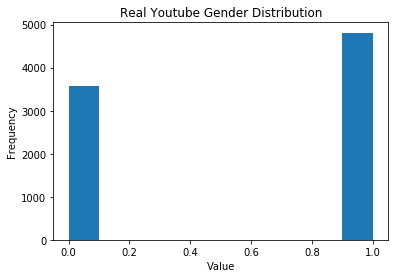

In [21]:
import numpy as np
#n, bins, patches = plt.hist(x=data_youtube['gender10'])
plt.hist(x=data_youtube['gender10'])
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1.2, step=0.5))
plt.title('Real Youtube Gender Distribution')
plt.show()

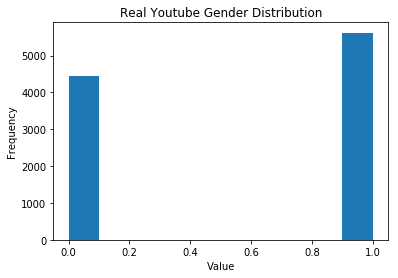

In [111]:
import numpy as np
#n, bins, patches = plt.hist(x=data_youtube['gender10'])
plt.hist(x=data_face2face['gender10'])
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1.2, step=0.5))
plt.title('Real Youtube Gender Distribution')
plt.show()

In [ ]:
pd.value_counts(data_youtube['gender10']).plot.bar()
print(data_youtube['gender10'].value_counts()/data_youtube.shape[0])

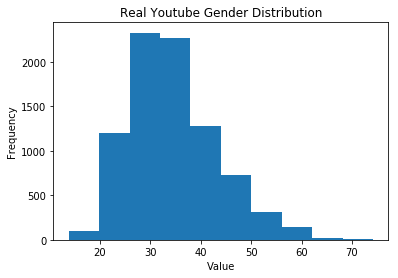

In [22]:
import numpy as np
#n, bins, patches = plt.hist(x=data_youtube['gender10'])
plt.hist(x=data_youtube['age'])
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1.2, step=0.5))
plt.title('Real Youtube Gender Distribution')
plt.show()

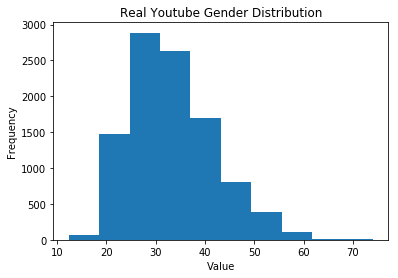

In [113]:
import numpy as np
#n, bins, patches = plt.hist(x=data_youtube['gender10'])
plt.hist(x=data_face2face['age'])
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1.2, step=0.5))
plt.title('Real Youtube Gender Distribution')
plt.show()

In [24]:
print(data_youtube['gender10'].value_counts()/data_youtube.shape[0])

1    0.574585
0    0.425415
Name: gender10, dtype: float64


In [112]:
print(data_face2face['gender10'].value_counts()/data_face2face.shape[0])

1    0.558049
0    0.441951
Name: gender10, dtype: float64


In [193]:
print(data_face2face_unq['gender10'].value_counts()/data_face2face_unq.shape[0])

1    0.567703
0    0.432297
Name: gender10, dtype: float64


In [301]:
data_youtube['age_cat'] = pd.cut(data_youtube['age'], bins = [0., 20., 30., 40., 50., np.inf], labels = 
                                ['age_less_20', 'age_20_30', 'age_30_40', 'age_40_50', 'age_above_50'])

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [281]:
data_face2face['age_cat'] = pd.cut(data_face2face['age'], bins = [0., 20., 30., 40., 50., np.inf], labels = 
                                ['age_less_20', 'age_20_30', 'age_30_40', 'age_40_50', 'age_above_50'])

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [194]:
data_face2face_unq['age_cat'] = pd.cut(data_face2face_unq['age'], bins = [0., 20., 30., 40., 50., np.inf], labels = 
                                ['age_less_20', 'age_20_30', 'age_30_40', 'age_40_50', 'age_above_50'])

In [32]:
print(data_youtube['age_cat'].value_counts()/data_youtube.shape[0])

age_30_40       0.425773
age_20_30       0.326884
age_40_50       0.177953
age_above_50    0.057208
age_less_20     0.012182
Name: age_cat, dtype: float64


In [115]:
print(data_face2face['age_cat'].value_counts()/data_face2face.shape[0])

age_30_40       0.401927
age_20_30       0.380077
age_40_50       0.156023
age_above_50    0.044890
age_less_20     0.017082
Name: age_cat, dtype: float64


In [195]:
print(data_face2face_unq['age_cat'].value_counts()/data_face2face_unq.shape[0])

age_30_40       0.416249
age_20_30       0.366098
age_40_50       0.156469
age_above_50    0.041123
age_less_20     0.020060
Name: age_cat, dtype: float64


In [282]:
data_face2face['gender_age_cat'] = data_face2face['gender10'].astype(str) + "_" + data_face2face['age_cat'].astype(str)

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [196]:
data_face2face_unq['gender_age_cat'] = data_face2face_unq['gender10'].astype(str) + "_" + data_face2face_unq['age_cat'].astype(str)

In [302]:
data_youtube['gender_age_cat'] = data_youtube['gender10'].astype(str) + "_" + data_youtube['age_cat'].astype(str)

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


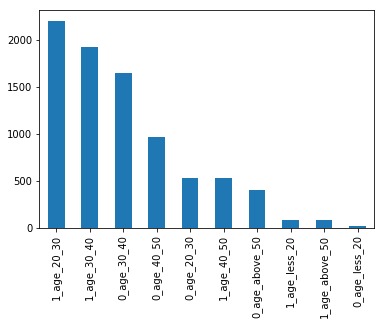

In [40]:
pd.value_counts(data_youtube['gender_age_cat']).plot.bar()

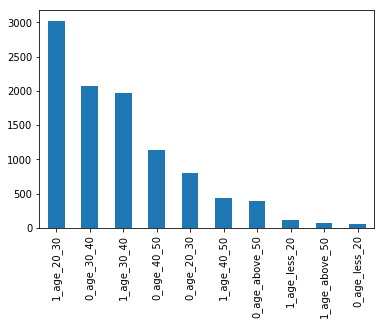

In [303]:
pd.value_counts(data_face2face['gender_age_cat']).plot.bar()

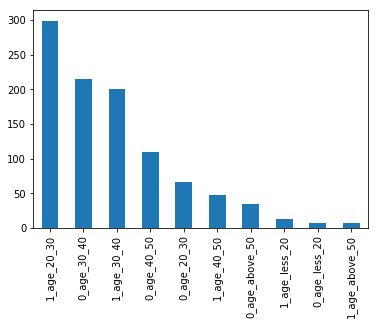

In [304]:
pd.value_counts(data_face2face_unq['gender_age_cat']).plot.bar()

In [41]:
print(data_youtube['gender_age_cat'].value_counts()/data_youtube.shape[0])

1_age_20_30       0.263108
1_age_30_40       0.229308
0_age_30_40       0.196465
0_age_40_50       0.114774
0_age_20_30       0.063776
1_age_40_50       0.063179
0_age_above_50    0.047892
1_age_less_20     0.009674
1_age_above_50    0.009316
0_age_less_20     0.002508
Name: gender_age_cat, dtype: float64


In [198]:
print(data_face2face_unq['gender_age_cat'].value_counts()/data_face2face_unq.shape[0])

1_age_20_30       0.299900
0_age_30_40       0.215647
1_age_30_40       0.200602
0_age_40_50       0.109328
0_age_20_30       0.066199
1_age_40_50       0.047141
0_age_above_50    0.034102
1_age_less_20     0.013039
0_age_less_20     0.007021
1_age_above_50    0.007021
Name: gender_age_cat, dtype: float64


In [52]:
from sklearn.model_selection import train_test_split
train_set1, test_set1 = train_test_split(data_youtube, test_size=0.2, 
                                         stratify = data_youtube['gender_age_cat'], 
                                         random_state=42)

In [53]:
print(train_set1['gender_age_cat'].value_counts()/train_set1.shape[0])

1_age_20_30       0.263064
1_age_30_40       0.229322
0_age_30_40       0.196477
0_age_40_50       0.114810
0_age_20_30       0.063750
1_age_40_50       0.063153
0_age_above_50    0.047925
1_age_less_20     0.009704
1_age_above_50    0.009256
0_age_less_20     0.002538
Name: gender_age_cat, dtype: float64


In [54]:
print(test_set1['gender_age_cat'].value_counts()/test_set1.shape[0])

1_age_20_30       0.263284
1_age_30_40       0.229254
0_age_30_40       0.196418
0_age_40_50       0.114627
0_age_20_30       0.063881
1_age_40_50       0.063284
0_age_above_50    0.047761
1_age_less_20     0.009552
1_age_above_50    0.009552
0_age_less_20     0.002388
Name: gender_age_cat, dtype: float64


In [200]:
target_source_f2f = data_face2face_unq['img_target_source'].tolist()

In [206]:
target_half = []
source_half = []
for ts in target_source_f2f:
    if ts[:3] not in source_half:
        target_half.append(ts[:3])
    if ts[4:7] not in target_half:
        source_half.append(ts[4:7])
print(len(target_half))
print(len(source_half))

500
500


In [207]:
data_face2face_unq['target'] = data_face2face_unq['img_target_source'].apply(lambda x: x[:3])
data_face2face_unq['source'] = data_face2face_unq['img_target_source'].apply(lambda x: x[4:7])

In [222]:
data_face2face_unq_target = data_face2face_unq[data_face2face_unq['target'].isin(target_half)]

In [223]:
data_face2face_unq_source = data_face2face_unq[data_face2face_unq['target'].isin(source_half)]

In [228]:
print(data_face2face_unq['gender_age_cat'].value_counts()/data_face2face_unq.shape[0])

1_age_20_30       0.299900
0_age_30_40       0.215647
1_age_30_40       0.200602
0_age_40_50       0.109328
0_age_20_30       0.066199
1_age_40_50       0.047141
0_age_above_50    0.034102
1_age_less_20     0.013039
0_age_less_20     0.007021
1_age_above_50    0.007021
Name: gender_age_cat, dtype: float64


In [227]:
print(data_face2face_unq_target['gender_age_cat'].value_counts()/500)

1_age_20_30       0.292
1_age_30_40       0.214
0_age_30_40       0.206
0_age_40_50       0.114
0_age_20_30       0.070
1_age_40_50       0.036
0_age_above_50    0.030
1_age_less_20     0.018
0_age_less_20     0.012
1_age_above_50    0.008
Name: gender_age_cat, dtype: float64


In [226]:
print(data_face2face_unq_source['gender_age_cat'].value_counts()/500)

1_age_20_30       0.306
0_age_30_40       0.224
1_age_30_40       0.186
0_age_40_50       0.104
0_age_20_30       0.062
1_age_40_50       0.058
0_age_above_50    0.038
1_age_less_20     0.008
1_age_above_50    0.006
0_age_less_20     0.002
Name: gender_age_cat, dtype: float64


In [221]:
if '015' in target_half:
    print('yes')
if '919' in source_half:
    print('yes')

yes
yes


In [213]:
print(data_face2face_unq.head())

                                                filename    gender        age  \
index                                                                           
1      /content/drive/My Drive/FakeImageDetector/data...  0.018259  39.866432   
4      /content/drive/My Drive/FakeImageDetector/data...  0.983510  21.640931   
7      /content/drive/My Drive/FakeImageDetector/data...  0.785545  23.871733   
9      /content/drive/My Drive/FakeImageDetector/data...  0.909293  31.828538   
21     /content/drive/My Drive/FakeImageDetector/data...  0.518979  37.803860   

          method  label fake_folder_name img_target_source            imgname  \
index                                                                           
1      Face2Face      0        Face2Face           377_333  377_333.mp4_1.jpg   
4      Face2Face      0        Face2Face           390_709  390_709.mp4_1.jpg   
7      Face2Face      0        Face2Face           763_930  763_930.mp4_1.jpg   
9      Face2Face      0    

In [214]:
print(data_face2face_unq[data_face2face_unq['target'] == '377'])

                                                filename    gender        age  \
index                                                                           
1      /content/drive/My Drive/FakeImageDetector/data...  0.018259  39.866432   

          method  label fake_folder_name img_target_source            imgname  \
index                                                                           
1      Face2Face      0        Face2Face           377_333  377_333.mp4_1.jpg   

      img_copy imgname_copy  gender10    age_cat gender_age_cat target source  
index                                                                          
1            1    377_333_1         0  age_30_40    0_age_30_40    377    333  


In [215]:
print(data_face2face_unq[data_face2face_unq['target'] == '333'])

                                                filename    gender        age  \
index                                                                           
4071   /content/drive/My Drive/FakeImageDetector/data...  0.033769  36.894009   

          method  label fake_folder_name img_target_source            imgname  \
index                                                                           
4071   Face2Face      0        Face2Face           333_377  333_377.mp4_1.jpg   

      img_copy imgname_copy  gender10    age_cat gender_age_cat target source  
index                                                                          
4071         1    333_377_1         0  age_30_40    0_age_30_40    333    377  


In [216]:
print(data_face2face_unq[data_face2face_unq['target'] == '015'])

                                                filename    gender       age  \
index                                                                          
21     /content/drive/My Drive/FakeImageDetector/data...  0.518979  37.80386   

          method  label fake_folder_name img_target_source            imgname  \
index                                                                           
21     Face2Face      0        Face2Face           015_919  015_919.mp4_1.jpg   

      img_copy imgname_copy  gender10    age_cat gender_age_cat target source  
index                                                                          
21           1    015_919_1         1  age_30_40    1_age_30_40    015    919  


In [217]:
print(data_face2face_unq[data_face2face_unq['target'] == '919'])

                                                filename    gender        age  \
index                                                                           
5743   /content/drive/My Drive/FakeImageDetector/data...  0.078723  26.030245   

          method  label fake_folder_name img_target_source            imgname  \
index                                                                           
5743   Face2Face      0        Face2Face           919_015  919_015.mp4_1.jpg   

      img_copy imgname_copy  gender10    age_cat gender_age_cat target source  
index                                                                          
5743         1    919_015_1         0  age_20_30    0_age_20_30    919    015  


In [209]:
data_face2face_unq_target.shape

(500, 15)

In [ ]:
targets = df.isin([0, 2])

In [229]:
data_face2face_unq_target_train_validation, data_face2face_unq_target_test = train_test_split(data_face2face_unq_target, test_size=0.2, 
                                         stratify = data_face2face_unq_target['gender_age_cat'], 
                                         random_state=42)

In [230]:
data_face2face_unq_target_train, data_face2face_target_unq_val = train_test_split(data_face2face_unq_target_train_validation, test_size=0.2, 
                                         stratify = data_face2face_unq_target_train_validation['gender_age_cat'], 
                                         random_state=42)

In [118]:
data_face2face_train_validation, data_face2face_test = train_test_split(data_face2face, test_size=0.2, 
                                         stratify = data_face2face['gender_age_cat'], 
                                         random_state=42)

In [119]:
data_face2face_train, data_face2face_val = train_test_split(data_face2face_train_validation, test_size=0.2, 
                                         stratify = data_face2face_train_validation['gender_age_cat'], 
                                         random_state=42)

In [64]:
data_youtube_train_validation, data_youtube_test = train_test_split(data_youtube, test_size=0.2, 
                                         stratify = data_youtube['gender_age_cat'], 
                                         random_state=42)

In [67]:
data_youtube_train, data_youtube_val = train_test_split(data_youtube_train_validation, test_size=0.2, 
                                         stratify = data_youtube_train_validation['gender_age_cat'], 
                                         random_state=42)

1    0.574585
0    0.425415
Name: gender10, dtype: float64


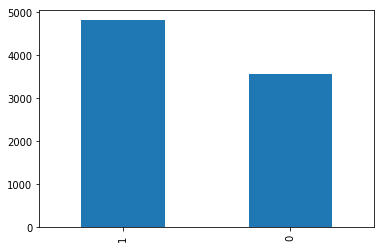

In [71]:
pd.value_counts(data_youtube['gender10']).plot.bar()
print(data_youtube['gender10'].value_counts()/data_youtube.shape[0])

1    0.574468
0    0.425532
Name: gender10, dtype: float64


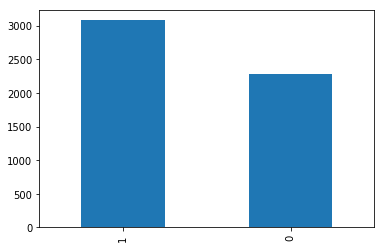

In [72]:
pd.value_counts(data_youtube_train['gender10']).plot.bar()
print(data_youtube_train['gender10'].value_counts()/data_youtube_train.shape[0])

1    0.574627
0    0.425373
Name: gender10, dtype: float64


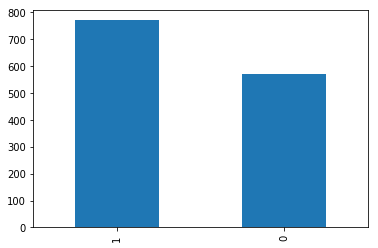

In [73]:
pd.value_counts(data_youtube_val['gender10']).plot.bar()
print(data_youtube_val['gender10'].value_counts()/data_youtube_val.shape[0])

1    0.574925
0    0.425075
Name: gender10, dtype: float64


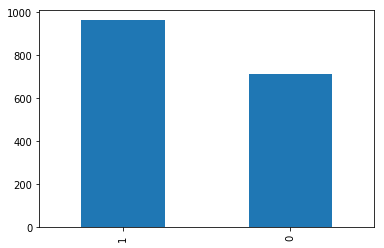

In [74]:
pd.value_counts(data_youtube_test['gender10']).plot.bar()
print(data_youtube_test['gender10'].value_counts()/data_youtube_test.shape[0])

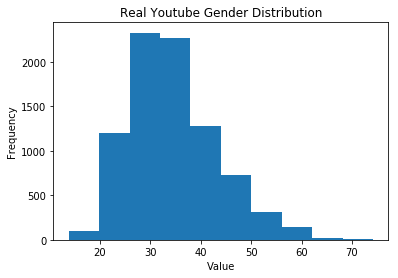

In [75]:
import numpy as np
#n, bins, patches = plt.hist(x=data_youtube['gender10'])
plt.hist(x=data_youtube['age'])
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1.2, step=0.5))
plt.title('Real Youtube Gender Distribution')
plt.show()

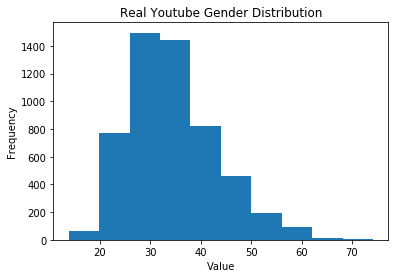

In [76]:
import numpy as np
#n, bins, patches = plt.hist(x=data_youtube['gender10'])
plt.hist(x=data_youtube_train['age'])
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1.2, step=0.5))
plt.title('Real Youtube Gender Distribution')
plt.show()

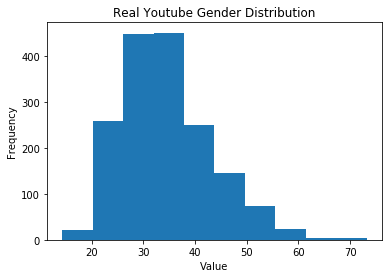

In [77]:
import numpy as np
#n, bins, patches = plt.hist(x=data_youtube['gender10'])
plt.hist(x=data_youtube_test['age'])
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1.2, step=0.5))
plt.title('Real Youtube Gender Distribution')
plt.show()

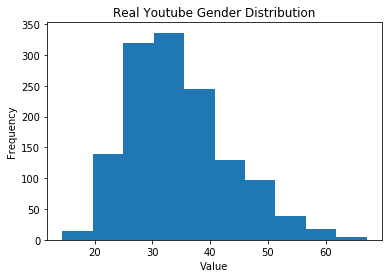

In [78]:
import numpy as np
#n, bins, patches = plt.hist(x=data_youtube['gender10'])
plt.hist(x=data_youtube_val['age'])
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1.2, step=0.5))
plt.title('Real Youtube Gender Distribution')
plt.show()

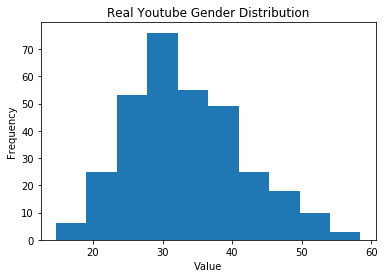

In [231]:
import numpy as np
#n, bins, patches = plt.hist(x=data_youtube['gender10'])
plt.hist(x=data_face2face_unq_target_train['age'])
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1.2, step=0.5))
plt.title('Real Youtube Gender Distribution')
plt.show()

In [79]:
print(data_youtube_train.head())

                                                filename    gender        age  \
index                                                                           
9357   /content/drive/My Drive/FakeImageDetector/real...  0.985527  45.161220   
5542   /content/drive/My Drive/FakeImageDetector/real...  0.015034  35.882441   
7100   /content/drive/My Drive/FakeImageDetector/real...  0.940185  47.077362   
5886   /content/drive/My Drive/FakeImageDetector/real...  0.800966  29.336288   
5405   /content/drive/My Drive/FakeImageDetector/real...  0.904831  35.394705   

      method  label             imgname  gender10    age_cat gender_age_cat  
index                                                                        
9357    Real      1  918.mp4_image3.jpg         1  age_40_50    1_age_40_50  
5542    Real      1  631.mp4_image6.jpg         0  age_30_40    0_age_30_40  
7100    Real      1  743.mp4_image2.jpg         1  age_40_50    1_age_40_50  
5886    Real      1  095.mp4_image9.jpg   

In [83]:
def get_3numname(df):
    imgs = df['imgname'].apply(lambda x: x[:3])
    return imgs

print(get_3numname(data_youtube_train).tolist())

['918', '631', '743', '095', '025', '685', '851', '989', '352', '589', '605', '808', '258', '302', '553', '015', '515', '347', '908', '132', '475', '527', '867', '648', '596', '762', '490', '660', '864', '950', '211', '707', '922', '992', '436', '222', '196', '648', '081', '992', '849', '185', '721', '361', '309', '557', '298', '653', '732', '054', '703', '078', '556', '245', '782', '833', '954', '947', '283', '327', '458', '140', '184', '331', '087', '023', '317', '995', '236', '199', '366', '910', '152', '325', '350', '081', '840', '904', '878', '094', '221', '046', '010', '246', '155', '388', '235', '832', '177', '164', '937', '346', '806', '016', '802', '089', '184', '857', '982', '162', '683', '095', '964', '443', '783', '257', '462', '528', '317', '365', '663', '893', '984', '608', '201', '557', '884', '742', '976', '920', '605', '060', '809', '723', '531', '355', '569', '679', '189', '650', '810', '097', '439', '844', '595', '018', '898', '197', '874', '222', '607', '302', '485'

In [86]:
train_val_test_dict = {}
train_val_test_dict['train'] = get_3numname(data_youtube_train).tolist()
train_val_test_dict['validation'] = get_3numname(data_youtube_val).tolist()
train_val_test_dict['test'] = get_3numname(data_youtube_test).tolist()

In [232]:
print(data_face2face_unq_target_train.head())

                                                filename    gender        age  \
index                                                                           
1748   /content/drive/My Drive/FakeImageDetector/data...  0.845889  27.559307   
2735   /content/drive/My Drive/FakeImageDetector/data...  0.969431  23.555553   
490    /content/drive/My Drive/FakeImageDetector/data...  0.992486  22.580248   
3111   /content/drive/My Drive/FakeImageDetector/data...  0.954956  29.142198   
4216   /content/drive/My Drive/FakeImageDetector/data...  0.983590  21.052065   

          method  label fake_folder_name img_target_source            imgname  \
index                                                                           
1748   Face2Face      0        Face2Face           722_458  722_458.mp4_1.jpg   
2735   Face2Face      0        Face2Face           641_662  641_662.mp4_1.jpg   
490    Face2Face      0        Face2Face           272_396  272_396.mp4_1.jpg   
3111   Face2Face      0    

In [260]:
tvt_f2f_ts = {}
tvt_f2f_ts['train'] = data_face2face_unq_target_train['img_target_source'].tolist()
tvt_f2f_ts['validation'] = data_face2face_target_unq_val['img_target_source'].tolist()
tvt_f2f_ts['test'] = data_face2face_unq_target_test['img_target_source'].tolist()

In [261]:
print(len(tvt_f2f_ts['train']))

320


In [255]:
def rev_text(text):
    new_text = text[4:7] + "_" + text[:3]
    return new_text

In [262]:
new_train = []
for v in tvt_f2f_ts['train']:
    new_train.append(v)
    new_train.append(rev_text(v))

In [264]:
new_val = []
for v in tvt_f2f_ts['validation']:
    new_val.append(v)
    new_val.append(rev_text(v))

In [265]:
new_test = []
for v in tvt_f2f_ts['test']:
    new_test.append(v)
    new_test.append(rev_text(v))

In [266]:
print(len(new_train))
print(len(new_val))
print(len(new_test))

640
160
200


In [267]:
tvt_f2f_ts['train'] = new_train
tvt_f2f_ts['validation'] = new_val
tvt_f2f_ts['test'] = new_test

In [269]:
print(len(tvt_f2f_ts['train']))

640


In [272]:
tvt_f2f_youtube_ts = {}
tvt_f2f_youtube_ts['train'] = [x[:3] for x in tvt_f2f_ts['train']]
tvt_f2f_youtube_ts['validation'] = [x[:3] for x in tvt_f2f_ts['validation']]
tvt_f2f_youtube_ts['test'] = [x[:3] for x in tvt_f2f_ts['test']]

In [288]:
face2face_train = data_face2face[data_face2face['img_target_source'].isin(tvt_f2f_ts['train'])]
face2face_val = data_face2face[data_face2face['img_target_source'].isin(tvt_f2f_ts['validation'])]
face2face_test = data_face2face[data_face2face['img_target_source'].isin(tvt_f2f_ts['test'])]

In [308]:
data_youtube['img_target_source'] = data_youtube['img_target_source'].apply(lambda x: x[:3])

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [309]:
youtube_train = data_youtube[data_youtube['img_target_source'].isin(tvt_f2f_youtube_ts['train'])]
youtube_val = data_youtube[data_youtube['img_target_source'].isin(tvt_f2f_youtube_ts['validation'])]
youtube_test = data_youtube[data_youtube['img_target_source'].isin(tvt_f2f_youtube_ts['test'])]

In [289]:
print(face2face_train['gender_age_cat'].value_counts()/face2face_train.shape[0])

1_age_20_30       0.301828
1_age_30_40       0.200125
0_age_30_40       0.194032
0_age_40_50       0.121856
0_age_20_30       0.080456
1_age_40_50       0.043431
0_age_above_50    0.034995
1_age_less_20     0.013748
1_age_above_50    0.005937
0_age_less_20     0.003593
Name: gender_age_cat, dtype: float64


In [291]:
print(face2face_val['gender_age_cat'].value_counts()/face2face_val.shape[0])

1_age_20_30       0.279126
0_age_30_40       0.230583
1_age_30_40       0.200243
0_age_20_30       0.087379
0_age_40_50       0.084951
0_age_above_50    0.050364
1_age_40_50       0.042476
0_age_less_20     0.011529
1_age_above_50    0.007282
1_age_less_20     0.006068
Name: gender_age_cat, dtype: float64


In [292]:
print(face2face_test['gender_age_cat'].value_counts()/face2face_test.shape[0])

1_age_20_30       0.313861
0_age_30_40       0.225743
1_age_30_40       0.177228
0_age_40_50       0.104455
0_age_20_30       0.070297
1_age_40_50       0.045545
0_age_above_50    0.040594
1_age_less_20     0.011386
1_age_above_50    0.006436
0_age_less_20     0.004455
Name: gender_age_cat, dtype: float64


In [310]:
print(youtube_train['gender_age_cat'].value_counts()/youtube_train.shape[0])

1_age_20_30       0.269705
1_age_30_40       0.220770
0_age_30_40       0.180613
0_age_40_50       0.128502
1_age_40_50       0.069481
0_age_20_30       0.065185
0_age_above_50    0.042585
1_age_above_50    0.010273
1_age_less_20     0.010086
0_age_less_20     0.002802
Name: gender_age_cat, dtype: float64


In [311]:
print(youtube_val['gender_age_cat'].value_counts()/youtube_val.shape[0])

1_age_30_40       0.279053
0_age_30_40       0.234641
1_age_20_30       0.228719
0_age_40_50       0.074759
0_age_20_30       0.071058
0_age_above_50    0.052554
1_age_40_50       0.044412
1_age_above_50    0.008882
1_age_less_20     0.005922
Name: gender_age_cat, dtype: float64


In [312]:
print(youtube_test['gender_age_cat'].value_counts()/youtube_test.shape[0])

1_age_20_30       0.269784
0_age_30_40       0.216427
1_age_30_40       0.216427
0_age_40_50       0.103118
0_age_above_50    0.061151
1_age_40_50       0.058153
0_age_20_30       0.053357
1_age_less_20     0.011391
1_age_above_50    0.006595
0_age_less_20     0.003597
Name: gender_age_cat, dtype: float64


In [270]:
import pickle

# a = {'hello': 'world'}

with open('tvt_split_f2f.pickle', 'wb') as handle:
    pickle.dump(tvt_f2f_ts, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print a == b

In [431]:
import pickle

# a = {'hello': 'world'}

with open('tvt_split_f2f_youtube.pickle', 'wb') as handle:
    pickle.dump(tvt_f2f_youtube_ts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [87]:
from os import listdir
from os.path import isfile, join
mypath = "./Face2Face_image"
fffiles_img = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(fffiles_img))

9865


In [88]:
print(fffiles_img[0])

180_105.mp4_3.jpg


In [130]:
for f in fffiles_img:
    if (f[:3] == '918') or (f[4:7] == '918'):
        print(f)

934_918.mp4_10.jpg
934_918.mp4_6.jpg
934_918.mp4_7.jpg
934_918.mp4_5.jpg
934_918.mp4_4.jpg
918_934.mp4_8.jpg
934_918.mp4_1.jpg
934_918.mp4_3.jpg
934_918.mp4_2.jpg
918_934.mp4_6.jpg
918_934.mp4_7.jpg
918_934.mp4_5.jpg
918_934.mp4_4.jpg
934_918.mp4_9.jpg
918_934.mp4_1.jpg
934_918.mp4_8.jpg
918_934.mp4_3.jpg
918_934.mp4_2.jpg


In [131]:
for f in fffiles_img:
    if (f[:3] == '605') or (f[4:7] == '605'):
        print(f)

605_591.mp4_7.jpg
591_605.mp4_14.jpg
605_591.mp4_6.jpg
605_591.mp4_4.jpg
605_591.mp4_5.jpg
605_591.mp4_1.jpg
591_605.mp4_12.jpg
591_605.mp4_9.jpg
591_605.mp4_8.jpg
591_605.mp4_13.jpg
605_591.mp4_2.jpg
591_605.mp4_11.jpg
591_605.mp4_10.jpg
605_591.mp4_3.jpg
591_605.mp4_6.jpg
591_605.mp4_7.jpg
591_605.mp4_5.jpg
591_605.mp4_4.jpg
605_591.mp4_8.jpg
591_605.mp4_1.jpg
605_591.mp4_9.jpg
591_605.mp4_3.jpg
591_605.mp4_2.jpg
605_591.mp4_11.jpg
605_591.mp4_10.jpg


In [120]:
def get_7numname(df):
    imgs = df['imgname'].apply(lambda x: x[:7])
    return imgs

print(get_7numname(data_face2face_train).tolist())

['596_609', '004_982', '691_732', '816_649', '788_710', '503_756', '546_621', '918_934', '211_177', '321_288', '958_956', '365_307', '831_508', '506_478', '222_168', '288_321', '108_052', '404_429', '809_799', '352_319', '384_932', '737_719', '338_336', '784_769', '091_116', '065_089', '741_731', '308_388', '863_853', '177_211', '781_806', '436_526', '118_120', '957_959', '117_217', '408_424', '761_766', '252_266', '059_050', '853_863', '733_935', '930_763', '988_966', '898_922', '269_268', '021_312', '373_394', '741_731', '339_392', '096_101', '840_800', '522_337', '280_249', '406_391', '369_316', '412_274', '808_829', '913_893', '621_546', '483_370', '037_072', '826_833', '096_101', '146_256', '365_307', '043_110', '545_553', '219_220', '779_794', '725_724', '469_481', '903_792', '313_283', '626_562', '214_255', '419_824', '861_858', '087_081', '367_371', '525_509', '721_715', '566_617', '568_628', '217_117', '458_722', '249_280', '299_145', '939_115', '175_159', '938_987', '309_303'

In [121]:
train_val_test_dict_f2f = {}
train_val_test_dict_f2f['train'] = get_7numname(data_face2face_train).tolist()
train_val_test_dict_f2f['validation'] = get_7numname(data_face2face_val).tolist()
train_val_test_dict_f2f['test'] = get_7numname(data_face2face_test).tolist()

In [127]:
train_val_test_dict_real = {}
immm = []
for im in train_val_test_dict_f2f['train']:
    im2 = im.split('_')
    immm.extend(im2)
    
print(len(immm))
myset = set(immm)
print(len(myset))

12888
1000


In [128]:
print(len(train_val_test_dict_f2f['train']))

6444


In [122]:
all_images = pd.read_csv('dataset_faces.csv')  

In [124]:
all_images['imgname'] = all_images['filename'].apply(lambda x: x.split('/')[-1])

In [ ]:
918.mp4_image3.jpg 
data_45= data_real['imgname'].apply(lambda x: x[4:7])
data_youtube = data_real[data_45 == 'mp4']

In [ ]:
# def check_in_train_test_dict(text):
#     if text in train_val_test_dict_f2f['train']:
#         return 'train'
#     elif text in train_val_test_dict_f2f['validation']:
#         return 'validation'
#     elif text in train_val_test_dict_f2f['test']:
#         return 'test'
#     else:
#         return np.nan

In [ ]:
# def labeling_to_train_val_test(textcell):
#     if textcell[4:7] == 'mp4':
#         return check_in_train_test_dict(textcell)
#     if textcell[:7] in train_val_test_dict_f2f['train']:
#         return 'train'
#     elif textcell[:7] in train_val_test_dict_f2f['validation']:
#         return 'validation'
#     elif textcell[:7] in train_val_test_dict_f2f['test']:
#         return 'test'
 